# Parte 1

### Este notebook tem como objetivo aplicar técnicas de Machine Learning (ML) e Inteligência Artificial (IA) para resolver um problema de predição com base em um conjunto de dados real ou simulado. Todo o processo é conduzido seguindo boas práticas de ciência de dados, desde a análise exploratória, tratamento dos dados, modelagem e avaliação de desempenho, até a interpretação dos resultados utilizando técnicas de XAI (eXplainable AI).

## Importando Bibliotecas e DataFrames

In [83]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.model_selection import RandomizedSearchCV, learning_curve , StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import json
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import os

# DataFrames de Treinamento
df_trn = pd.read_csv("./data/dados_projeto_evasao_treino.csv") # DataFrame base

# DataFrames de Teste
df_tst = pd.read_csv("./data/dados_projeto_evasao_teste.csv") # DataFrame base

# Parte 2
## Visualizando DataFrames base

In [84]:
# Verificando o tamanho do dataframe de Treino
df_trn.shape

(400, 37)

In [85]:
# Verificando o tamanho do dataframe de Teste
df_tst.shape

(100, 37)

In [86]:
# Visualizando os dados aleatórios
df_trn.sample(15)

,Unnamed: 0,ds_cidade_usuario,ts_primeiro_acesso,ts_ultimo_acesso,nr_dias_desde_primeiro_acesso,nr_dias_desde_ultimo_acesso,nr_atividades_sinalizadas,nr_atividades_mapeadas,nr_discussoes_forum_postadas,nr_questionarios_abandonados,...,nr_questoes_parciais,vl_desempenho_usuario,vl_media_questoes_por_dia,vl_engajamento_notas,nr_itens_avaliados,nr_itens_nao_respondidos,vl_media_notas,nr_submissoes_codigo,vl_media_submissoes_codigo,vl_submissoes_por_dias_ativos
104,136,Campinas,0,0,19612,19612,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
166,210,Campinas,0,0,19612,19612,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
275,337,Campinas,0,0,19612,19612,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
297,365,Campinas,0,0,19612,19612,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
305,375,Campinas,0,0,19612,19612,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
18,25,Campinas,0,0,19612,19612,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
362,447,Campinas,0,0,19612,19612,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
184,229,Campinas,1690401218,1690401376,47,47,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
169,214,Campinas,0,0,19612,19612,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
245,297,Campinas,0,0,19612,19612,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN


In [87]:
# Visualizando colunas do dataframe
df_trn.columns

Index(['Unnamed: 0', 'ds_cidade_usuario', 'ts_primeiro_acesso',
       'ts_ultimo_acesso', 'nr_dias_desde_primeiro_acesso',
       'nr_dias_desde_ultimo_acesso', 'nr_atividades_sinalizadas',
       'nr_atividades_mapeadas', 'nr_discussoes_forum_postadas',
       'nr_questionarios_abandonados', 'nr_questionarios_finalizados',
       'vl_medio_tempo_questionario', 'vl_medio_tempo_questionario_avaliado',
       'vl_desempenho_questionario', 'nr_intervalos_uso', 'nr_dias_uso',
       'vl_medio_atividade_diaria', 'vl_engajamento_usuario_por_intervalo',
       'vl_engajamento_usuario_intradia', 'nr_interacoes_usuario',
       'nr_dias_engajamento_discussao', 'nr_dias_engajamento_questionario',
       'nr_engajamento_discussao', 'nr_engajamento_questionario',
       'nr_questoes_respondidas', 'nr_questoes_corretas',
       'nr_questoes_erradas', 'nr_questoes_parciais', 'vl_desempenho_usuario',
       'vl_media_questoes_por_dia', 'vl_engajamento_notas',
       'nr_itens_avaliados', 'nr_itens_n

In [88]:
# Visualizando informações do dataframe
df_trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 37 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            400 non-null    int64  
 1   ds_cidade_usuario                     346 non-null    object 
 2   ts_primeiro_acesso                    400 non-null    int64  
 3   ts_ultimo_acesso                      400 non-null    int64  
 4   nr_dias_desde_primeiro_acesso         400 non-null    int64  
 5   nr_dias_desde_ultimo_acesso           400 non-null    int64  
 6   nr_atividades_sinalizadas             400 non-null    int64  
 7   nr_atividades_mapeadas                400 non-null    int64  
 8   nr_discussoes_forum_postadas          400 non-null    int64  
 9   nr_questionarios_abandonados          400 non-null    int64  
 10  nr_questionarios_finalizados          400 non-null    int64  
 11  vl_medio_tempo_ques

In [89]:
# Visualizando valores nulos
df_trn.isnull().sum()

Unnamed: 0                                0
ds_cidade_usuario                        54
ts_primeiro_acesso                        0
ts_ultimo_acesso                          0
nr_dias_desde_primeiro_acesso             0
nr_dias_desde_ultimo_acesso               0
nr_atividades_sinalizadas                 0
nr_atividades_mapeadas                    0
nr_discussoes_forum_postadas              0
nr_questionarios_abandonados              0
nr_questionarios_finalizados              0
vl_medio_tempo_questionario             289
vl_medio_tempo_questionario_avaliado    293
vl_desempenho_questionario              373
nr_intervalos_uso                       191
nr_dias_uso                               0
vl_medio_atividade_diaria               191
vl_engajamento_usuario_por_intervalo    371
vl_engajamento_usuario_intradia         371
nr_interacoes_usuario                     0
nr_dias_engajamento_discussao             0
nr_dias_engajamento_questionario          0
nr_engajamento_discussao        

In [90]:
# Verificando a porcentagem de valores nulos
df_trn.isnull().mean() * 100  

Unnamed: 0                               0.00
ds_cidade_usuario                       13.50
ts_primeiro_acesso                       0.00
ts_ultimo_acesso                         0.00
nr_dias_desde_primeiro_acesso            0.00
nr_dias_desde_ultimo_acesso              0.00
nr_atividades_sinalizadas                0.00
nr_atividades_mapeadas                   0.00
nr_discussoes_forum_postadas             0.00
nr_questionarios_abandonados             0.00
nr_questionarios_finalizados             0.00
vl_medio_tempo_questionario             72.25
vl_medio_tempo_questionario_avaliado    73.25
vl_desempenho_questionario              93.25
nr_intervalos_uso                       47.75
nr_dias_uso                              0.00
vl_medio_atividade_diaria               47.75
vl_engajamento_usuario_por_intervalo    92.75
vl_engajamento_usuario_intradia         92.75
nr_interacoes_usuario                    0.00
nr_dias_engajamento_discussao            0.00
nr_dias_engajamento_questionario  

In [91]:
# Visualizando dados duplicados
df_trn.duplicated().sum()


np.int64(0)

In [92]:
# Visualizando estatísticas descritivas
df_trn.describe()

,Unnamed: 0,ts_primeiro_acesso,ts_ultimo_acesso,nr_dias_desde_primeiro_acesso,nr_dias_desde_ultimo_acesso,nr_atividades_sinalizadas,nr_atividades_mapeadas,nr_discussoes_forum_postadas,nr_questionarios_abandonados,nr_questionarios_finalizados,...,nr_questoes_parciais,vl_desempenho_usuario,vl_media_questoes_por_dia,vl_engajamento_notas,nr_itens_avaliados,nr_itens_nao_respondidos,vl_media_notas,nr_submissoes_codigo,vl_media_submissoes_codigo,vl_submissoes_por_dias_ativos
count,400.000000,4.000000e+02,4.000000e+02,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,...,400.000000,113.000000,61.000000,61.000000,400.000000,400.0000,113.000000,400.000000,4.0000,8.000000
mean,248.027500,8.647958e+08,8.664560e+08,9602.667500,9583.465000,0.17750,0.947500,0.345000,0.035000,1.445000,...,0.257500,0.876987,0.709287,0.438528,2.407500,22.2125,0.875059,0.535000,6.7143,11.083350
std,140.580382,8.445285e+08,8.461345e+08,9774.754241,9793.330251,1.22464,5.036184,2.840095,0.271956,4.569922,...,1.024117,0.256726,0.883716,0.383358,7.610272,60.1802,0.253001,4.720645,0.0000,4.914363
min,1.000000,0.000000e+00,0.000000e+00,4.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.012800,0.008500,0.000000,0.0000,0.000000,0.000000,6.7143,6.000000
25%,131.500000,0.000000e+00,0.000000e+00,20.000000,12.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.919434,0.209200,0.117200,0.000000,0.0000,0.919389,0.000000,6.7143,6.750000
50%,245.500000,1.661414e+09,1.666093e+09,382.500000,328.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.500000,0.312500,0.000000,0.0000,1.000000,0.000000,6.7143,11.333350
75%,367.250000,1.692747e+09,1.693434e+09,19612.000000,19612.000000,0.00000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.928600,0.666700,1.000000,47.2500,1.000000,0.000000,6.7143,15.666700
max,499.000000,1.694097e+09,1.694471e+09,19612.000000,19612.000000,11.00000,48.000000,39.000000,3.000000,27.000000,...,9.000000,1.000000,5.250000,1.333300,50.000000,716.0000,1.000000,47.000000,6.7143,15.666700


In [93]:
# Verificando a quantidade de valores únicos por coluna
df_trn.nunique()

Unnamed: 0                              400
ds_cidade_usuario                        10
ts_primeiro_acesso                       91
ts_ultimo_acesso                         91
nr_dias_desde_primeiro_acesso            52
nr_dias_desde_ultimo_acesso              41
nr_atividades_sinalizadas                 4
nr_atividades_mapeadas                    9
nr_discussoes_forum_postadas              6
nr_questionarios_abandonados              4
nr_questionarios_finalizados             12
vl_medio_tempo_questionario              43
vl_medio_tempo_questionario_avaliado     40
vl_desempenho_questionario                9
nr_intervalos_uso                        38
nr_dias_uso                              19
vl_medio_atividade_diaria                73
vl_engajamento_usuario_por_intervalo     11
vl_engajamento_usuario_intradia          11
nr_interacoes_usuario                    19
nr_dias_engajamento_discussao            13
nr_dias_engajamento_questionario         16
nr_engajamento_discussao        

# Parte 3
## Limpando DataFrames

### Convertendo TimeStamps para DataTime

In [94]:
# Função para converter timestamps de segundos para datetime
def timestamps_to_datatime(df):
    df['ts_primeiro_acesso'] = pd.to_datetime(df['ts_primeiro_acesso'], unit='s', errors='coerce')
    df['ts_ultimo_acesso'] = pd.to_datetime(df['ts_ultimo_acesso'], unit='s', errors='coerce')
    return df

df_trn = timestamps_to_datatime(df_trn)
df_tst = timestamps_to_datatime(df_tst)


### **Método 1:** Tratando valores faltantes com valor zero

In [95]:
# Preenchendo valores nulos com Infill 0
# df_trn = df_trn.fillna(0)
# df_tst = df_tst.fillna(0)

### **Método 2:** Tratando valores faltantes com KNNImputer em colunas com menos 70% dos valores nulos e excluindo as demais colunas com mais de 70% dos valores nulos

In [96]:
# # Remover colunar que tenham mais de 70% de valores nulos e mostrar colunas removidas
# cols_to_drop_trn = df_trn.columns[df_trn.isnull().mean() > 0.7]
# cols_to_drop_tst = df_tst.columns[df_tst.isnull().mean() > 0.7]
# print("Colunas removidas do conjunto de treino:", cols_to_drop_trn.tolist())
# print("Colunas removidas do conjunto de teste:", cols_to_drop_tst.tolist())
# df_trn = df_trn.drop(columns=cols_to_drop_trn)
# df_tst = df_tst.drop(columns=cols_to_drop_tst)

# # Imputar valores nulos com KnNImputer
# imputer = KNNImputer(n_neighbors=5)
# df_trn_imputed = pd.DataFrame(imputer.fit_transform(df_trn.select_dtypes(include=['float64', 'int64'])), 
#                               columns=df_trn.select_dtypes(include=['float64', 'int64']).columns)
# df_tst_imputed = pd.DataFrame(imputer.transform(df_tst.select_dtypes(include=['float64', 'int64'])),
#                               columns=df_tst.select_dtypes(include=['float64', 'int64']).columns)
# # Concatenar os quadros de dados imputados com as colunas não numéricas originais
# df_trn = pd.concat([df_trn.select_dtypes(exclude=['float64', 'int64']), df_trn_imputed], axis=1)
# df_tst = pd.concat([df_tst.select_dtypes(exclude=['float64', 'int64']), df_tst_imputed], axis=1)

### **Método 3:** Tratando valores faltantes com KNNImputer em colunas com menos 70% dos valores nulos e colunas com mais de 70% dos valores nulos com infill 0 - **MÉTODO UTILIZADO**

In [97]:
# Selecionar colunas com mais de 70% de valores nulos
cols_to_impute = df_trn.columns[df_trn.isnull().mean() > 0.7]
# Aplicar KNNImputer apenas nessas colunas
imputer = KNNImputer(n_neighbors=5)
df_trn[cols_to_impute] = imputer.fit_transform(df_trn[cols_to_impute])
df_tst[cols_to_impute] = imputer.transform(df_tst[cols_to_impute])
# Verificar se ainda existem valores nulos
print(df_trn.isnull().sum())
print(df_tst.isnull().sum())


Unnamed: 0                                0
ds_cidade_usuario                        54
ts_primeiro_acesso                        0
ts_ultimo_acesso                          0
nr_dias_desde_primeiro_acesso             0
nr_dias_desde_ultimo_acesso               0
nr_atividades_sinalizadas                 0
nr_atividades_mapeadas                    0
nr_discussoes_forum_postadas              0
nr_questionarios_abandonados              0
nr_questionarios_finalizados              0
vl_medio_tempo_questionario               0
vl_medio_tempo_questionario_avaliado      0
vl_desempenho_questionario                0
nr_intervalos_uso                       191
nr_dias_uso                               0
vl_medio_atividade_diaria               191
vl_engajamento_usuario_por_intervalo      0
vl_engajamento_usuario_intradia           0
nr_interacoes_usuario                     0
nr_dias_engajamento_discussao             0
nr_dias_engajamento_questionario          0
nr_engajamento_discussao        

### Removendo dados de pessoas que nunca acessaram

In [98]:
# Função para remover registros que nunca foram acessados
def remover_nunca_acessado(df):
    return df[(df['ts_primeiro_acesso'].dt.year != 1970) & 
              (df['ts_ultimo_acesso'].dt.year != 1970)]

df_trn = remover_nunca_acessado(df_trn)
df_tst = remover_nunca_acessado(df_tst)

print(len(df_trn))
print(len(df_tst))

205
46


### **Lógica de Evasão:** A lógica de evasão adotada pelo modelo baseia-se na análise da ausência e do desengajamento dos alunos em relação às atividades da plataforma. Um aluno é considerado evadido quando apresenta 30 dias consecutivos de ausência fora do período de férias escolares (julho ou de dezembro a fevereiro). Além disso, alunos que iniciaram suas atividades, mas permanecem inativos por mais de 15 dias, também são classificados como evadidos devido ao desengajamento com o ambiente virtual de aprendizagem.

In [99]:
# Função para verificar se a data está dentro do período de férias
def esta_em_ferias(data_str):
    try:
        data = pd.to_datetime(data_str)
        mes = data.month
        dia = data.day

        # Julho
        if (mes == 6 and dia >= 30) or (mes == 7 and dia <= 31):
            return True

        # Dezembro até Fevereiro
        if (mes == 12 and dia >= 15) or (mes in [1, 2]) or (mes == 2 and dia <= 28):
            return True

        return False
    except:
        return False


# Função para definir evasão com base nas regras fornecidas
def definir_evasao(row):
    score = 0
    
    if row['nr_dias_desde_primeiro_acesso'] < 15:
        return 0

    if row['nr_dias_desde_ultimo_acesso'] >= 30 and not esta_em_ferias(row['ts_ultimo_acesso']):
        score += 4

    if row['nr_submissoes_codigo'] == 0:
        score += 1

    if row['nr_questionarios_finalizados'] == 0:
        score += 1

    if row['nr_interacoes_usuario'] < 3:
        score += 1

    if row['nr_dias_uso'] < 5:
        score += 1

    return 1 if score >= 4 else 0


df_trn['nr_abandono'] = df_trn.apply(definir_evasao, axis=1)
df_tst['nr_abandono'] = df_tst.apply(definir_evasao, axis=1)

print('treino knn',df_trn["nr_abandono"].value_counts())
print('teste knn',df_tst["nr_abandono"].value_counts(),)


treino knn nr_abandono
0    149
1     56
Name: count, dtype: int64
teste knn nr_abandono
0    32
1    14
Name: count, dtype: int64


### Feature Engeenering

In [100]:
# Função de feature engineering
def aplicar_feature_engineering(df):
    df['vl_taxa_acerto_questoes'] = df['nr_questoes_corretas'] / df['nr_questoes_respondidas'].replace(0, 1) # Taxa de acerto em questões (replace() evita divisão por zero)
    df['vl_forum_por_dia'] = df['nr_discussoes_forum_postadas'] / df['nr_dias_uso'].replace(0, 1) # Número de postagens no fórum por dia de uso
    df['vl_dias_entre_acessos'] = df['nr_dias_desde_primeiro_acesso'] / df['nr_intervalos_uso'].replace(0, 1) # Média de dias entre acessos
    df['vl_submissoes_por_dia'] = df['nr_submissoes_codigo'] / df['nr_dias_uso'].replace(0, 1) # Submissões de código por dia de uso
    df['nr_periodo_ferias'] = df['ts_ultimo_acesso'].apply(esta_em_ferias).astype(int) # Indica se o último acesso foi em período de férias (1 True, 0 False)
    return df

df_trn = aplicar_feature_engineering(df_trn)
df_tst = aplicar_feature_engineering(df_tst)

### Removendo colunas não mais nescesarias

In [101]:
# Colunas a serem removidas
colunas_remover = ['ts_primeiro_acesso', 'ts_ultimo_acesso', 'ds_cidade_usuario','nr_interacoes_usuario','Unnamed: 0']

# Removendo colunas desnecessárias
df_trn = df_trn.drop(columns=colunas_remover)
df_tst = df_tst.drop(columns=colunas_remover)


### Separando Dados em treino e teste

In [102]:
# Função para separar as features (X) e o alvo (y) de um DataFrame
def split_X_y(df, target='nr_abandono'):
    """
    Separa as features (X) e o alvo (y) de um DataFrame.

    Parâmetros:
    - df: DataFrame de entrada.
    - target: nome da coluna alvo.

    Retorna:
    - X: DataFrame com as features.
    - y: Series com a coluna alvo.
    """
    X = df.drop(columns=[target])
    y = df[target]
    return X, y

# Separando treino e teste
X_train, y_train = split_X_y(df_trn)
X_test, y_test = split_X_y(df_tst)

# Parte 4
## RandomForestClassifier

In [103]:
# Definindo o pipeline com SMOTE e RandomForestClassifier
pipeline_rfc = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rfc', RandomForestClassifier(random_state=42))
])

In [104]:
# Treinar o modelo base
pipeline_rfc.fit(X_train, y_train)
 
# Selecionar as 10 features mais importantes
def select_top_features(model, type_model, X_train, X_test, top_n=10):
    # Obter as importâncias das features do estimador final do pipeline
    feature_importances = model.named_steps[type_model].feature_importances_
    feature_names = X_train.columns

    # Criar um DataFrame para as importâncias
    importances_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    # Selecionar as top_n features
    top_features = importances_df.head(top_n)['Feature'].tolist()

    # Filtrar os dados de treinamento e teste para incluir apenas as top_n features
    X_train = X_train[top_features]
    X_test = X_test[top_features]

    print("Top 10 Features Selecionadas:")
    print(importances_df.head(top_n))

    return X_train, X_test
 
X_train, X_test = select_top_features(pipeline_rfc, "rfc", X_train, X_test)

Top 10 Features Selecionadas:
                          Feature  Importance
1     nr_dias_desde_ultimo_acesso    0.223606
34          vl_dias_entre_acessos    0.177074
0   nr_dias_desde_primeiro_acesso    0.129149
27       nr_itens_nao_respondidos    0.073226
11                    nr_dias_uso    0.037741
6    nr_questionarios_finalizados    0.032363
12      vl_medio_atividade_diaria    0.031227
28                 vl_media_notas    0.031185
10              nr_intervalos_uso    0.025993
17       nr_engajamento_discussao    0.019926


In [105]:
# Hiperparâmetros para random forest
param_dist = {
    'rfc__n_estimators': [100, 200, 300, 400, 500],
    'rfc__max_depth': [None, 10, 20, 30, 40, 50],
    'rfc__min_samples_split': [2, 5, 10],
    'rfc__min_samples_leaf': [1, 2, 4],
    'rfc__bootstrap': [True, False]
}

# RandomizedSearchCV para otimização de hiperparâmetros
# Usando validação cruzada estratificada para lidar com o desbalanceamento de classes
random_search = RandomizedSearchCV(
    estimator=pipeline_rfc,
    param_distributions=param_dist,
    n_iter=150,
    scoring='roc_auc',
    verbose=2,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), # Validação cruzada estratificada
    random_state=42,
    n_jobs=-1
)

In [106]:
# Função para rankear modelos com base em recall e roc_auc
def rank_models(metrics_list):
    # Criar DataFrame com métricas
    metrics_df = pd.DataFrame(metrics_list)
    
    # Rankear os modelos com base em recall e roc_auc
    metrics_df['recall_rank'] = metrics_df['recall'].rank(ascending=False)
    metrics_df['roc_auc_rank'] = metrics_df['roc_auc'].rank(ascending=False)
    
    # Calcular a soma das posições
    metrics_df['rank_sum'] = metrics_df['recall_rank'] + metrics_df['roc_auc_rank']
    
    # Selecionar o modelo com a menor soma das posições
    best_model_index = metrics_df['rank_sum'].idxmin()
    best_model_metrics = metrics_df.loc[best_model_index]
    
    print("\nMelhor modelo:")
    print(best_model_metrics, "\n")
    
    return best_model_index, best_model_metrics
 
# Realizar RandomizedSearchCV
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] END rfc__bootstrap=False, rfc__max_depth=50, rfc__min_samples_leaf=2, rfc__min_samples_split=10, rfc__n_estimators=200; total time=   0.2s
[CV] END rfc__bootstrap=False, rfc__max_depth=50, rfc__min_samples_leaf=2, rfc__min_samples_split=10, rfc__n_estimators=200; total time=   0.2s
[CV] END rfc__bootstrap=True, rfc__max_depth=10, rfc__min_samples_leaf=4, rfc__min_samples_split=10, rfc__n_estimators=200; total time=   0.2s
[CV] END rfc__bootstrap=False, rfc__max_depth=50, rfc__min_samples_leaf=2, rfc__min_samples_split=10, rfc__n_estimators=200; total time=   0.2s
[CV] END rfc__bootstrap=False, rfc__max_depth=50, rfc__min_samples_leaf=2, rfc__min_samples_split=10, rfc__n_estimators=200; total time=   0.3s
[CV] END rfc__bootstrap=False, rfc__max_depth=50, rfc__min_samples_leaf=2, rfc__min_samples_split=10, rfc__n_estimators=200; total time=   0.3s
[CV] END rfc__bootstrap=True, rfc__max_depth=10, rfc__min_samples_leaf=4, 

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                             ('rfc',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=150, n_jobs=-1,
                   param_distributions={'rfc__bootstrap': [True, False],
                                        'rfc__max_depth': [None, 10, 20, 30, 40,
                                                           50],
                                        'rfc__min_samples_leaf': [1, 2, 4],
                                        'rfc__min_samples_split': [2, 5, 10],
                                        'rfc__n_estimators': [100, 200, 300,
                                                              400, 500]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [107]:
# Avaliar os modelos gerados
metrics_list = []
for params, mean_test_score, std_test_score in zip(random_search.cv_results_['params'], random_search.cv_results_['mean_test_score'], random_search.cv_results_['std_test_score']):
    model = random_search.best_estimator_
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    metrics_list.append({
        'params': params,
        'recall': recall,
        'roc_auc': roc_auc
    })

In [108]:
# Melhor modelo
best_model_index, best_model_metrics = rank_models(metrics_list)

# Melhores parametros encontrados recall, roc_auc, precision, f1
print("Melhores parâmetros encontrados:")
print(random_search.best_params_)
print("Melhor score de validação (ROC AUC):")
print(random_search.best_score_)
from sklearn.metrics import classification_report, confusion_matrix
print("Relatório de classificação:")
print(classification_report(y_test, y_pred))


Melhor modelo:
params          {'rfc__n_estimators': 500, 'rfc__min_samples_s...
recall                                                   0.785714
roc_auc                                                  0.997768
recall_rank                                                  75.5
roc_auc_rank                                                 75.5
rank_sum                                                    151.0
Name: 0, dtype: object 

Melhores parâmetros encontrados:
{'rfc__n_estimators': 500, 'rfc__min_samples_split': 2, 'rfc__min_samples_leaf': 2, 'rfc__max_depth': 40, 'rfc__bootstrap': False}
Melhor score de validação (ROC AUC):
1.0
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96        32
           1       1.00      0.79      0.88        14

    accuracy                           0.93        46
   macro avg       0.96      0.89      0.92        46
weighted avg       0.94      0.93      0.93        46



--------------------------------------------------------
AUC no conjunto de treino: 1.0000
AUC no conjunto de teste: 0.8929
--------------------------------------------------------



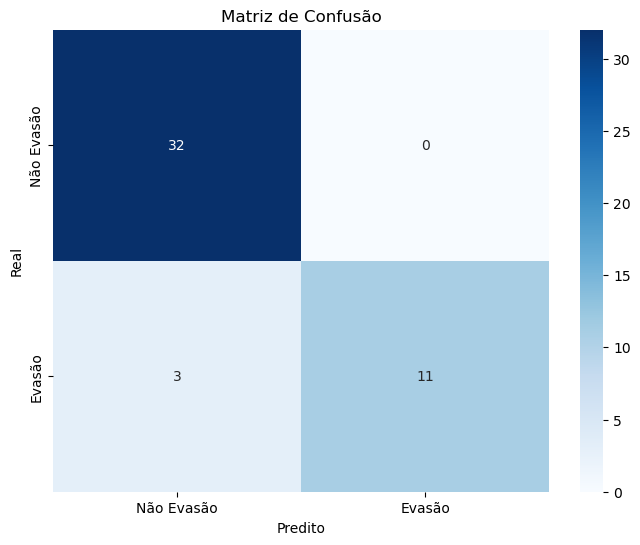

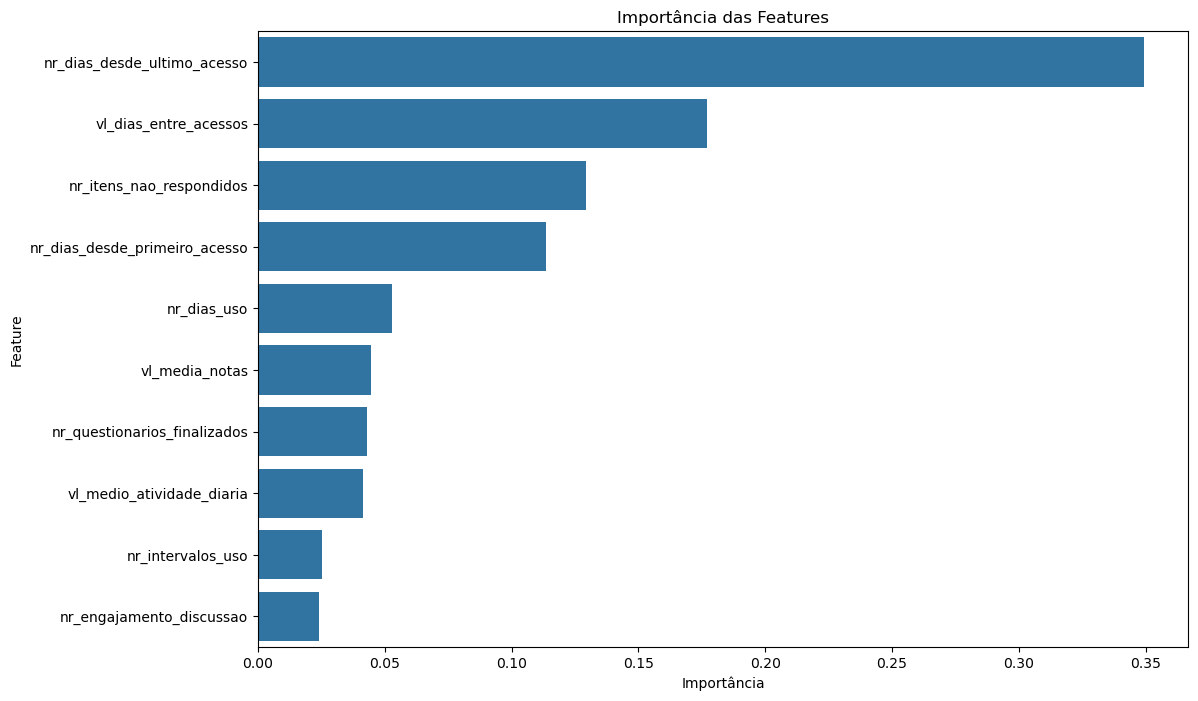

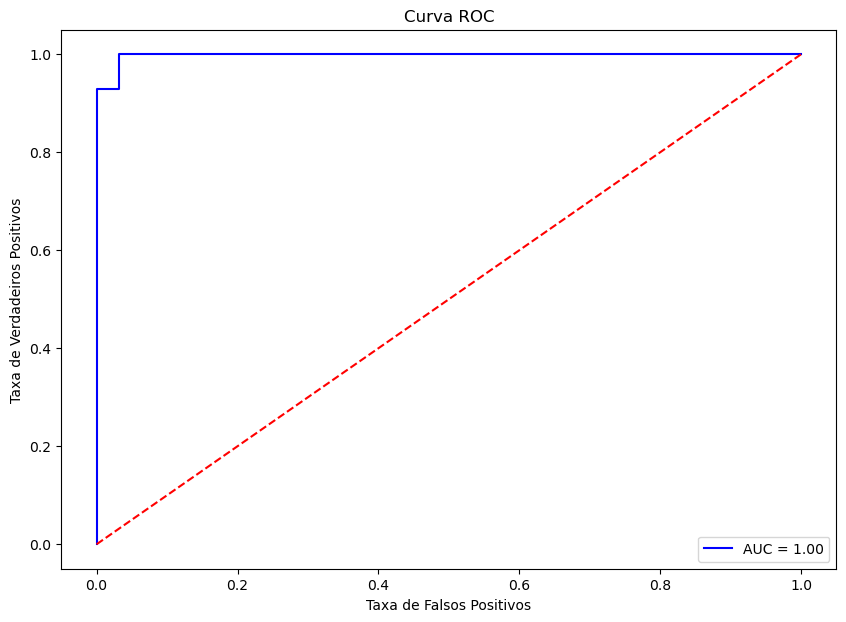

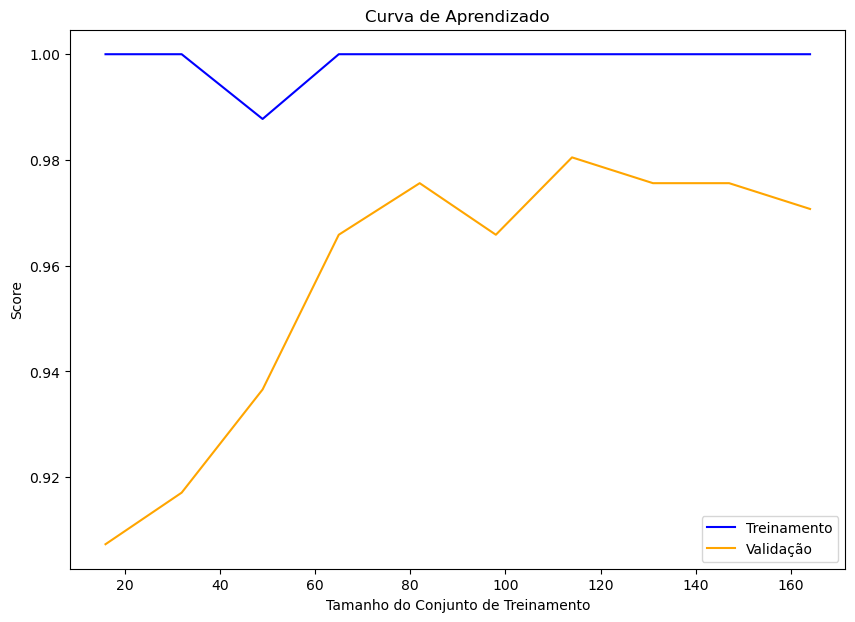

In [109]:
# Função com todos os plots a baixo
def plot_metrics(y_test, y_pred, type_model):
    # Verificar overfitting se ocorreu overfitting
    from sklearn.metrics import roc_auc_score
    train_auc = roc_auc_score(y_train, random_search.predict(X_train))
    test_auc = roc_auc_score(y_test, y_pred)
    print("--------------------------------------------------------")
    print(f"AUC no conjunto de treino: {train_auc:.4f}")
    print(f"AUC no conjunto de teste: {test_auc:.4f}")
    print("--------------------------------------------------------\n")

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Evasão', 'Evasão'], yticklabels=['Não Evasão', 'Evasão'])
    plt.title('Matriz de Confusão')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

    # Visualizar importancia das features com nomes
    importances = random_search.best_estimator_.named_steps[type_model].feature_importances_
    feature_names = X_train.columns
    # Criar um DataFrame para as importâncias
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    # Ordenar por importância
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    # Plotar as importâncias
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title('Importância das Features')
    plt.xlabel('Importância')
    plt.ylabel('Feature')
    plt.show()  

    # Plotar a curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, random_search.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr, color='blue', label='AUC = {:.2f}'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.title('Curva ROC')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.legend()
    plt.show()

    # Plotar a curva de aprendizado
    train_sizes, train_scores, test_scores = learning_curve(
        random_search.best_estimator_, X_train, y_train,
        cv=5, n_jobs=-1, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    )
    train_scores_mean = train_scores.mean(axis=1)
    test_scores_mean = test_scores.mean(axis=1)
    plt.figure(figsize=(10, 7))
    plt.plot(train_sizes, train_scores_mean, label='Treinamento', color='blue')
    plt.plot(train_sizes, test_scores_mean, label='Validação', color='orange')
    plt.title('Curva de Aprendizado')
    plt.xlabel('Tamanho do Conjunto de Treinamento')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

# Chamar a função para plotar as métricas
plot_metrics(y_test, y_pred, 'rfc')

In [110]:
# Salvar metricas em um arquivo JSON
metrics = {
    'best_params': random_search.best_params_,
    'best_score': random_search.best_score_,
    'classification_report': classification_report(y_test, y_pred, output_dict=True),
    'confusion_matrix': confusion_matrix(y_test, y_pred).tolist(),
    'roc_auc': roc_auc_score(y_test, y_pred_proba),
    'recall': recall_score(y_test, y_pred),
}
with open('models/metrics_rfc.json', 'w') as f:
    json.dump(metrics, f, indent=4)

# Salvar o modelo treinado
joblib.dump(random_search.best_estimator_, 'models/modelo_rfc.pkl')

['models/modelo_rfc.pkl']

# Parte 5
## XGBoost

In [111]:
# Definindo o pipeline com SMOTE e XGBClassifier
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

In [112]:
# Treinar o modelo base
pipeline_xgb.fit(X_train, y_train)

# Selecionar as 10 features mais importantes
X_train, X_test = select_top_features(pipeline_xgb, 'xgb', X_train, X_test)


Top 10 Features Selecionadas:
                         Feature  Importance
0    nr_dias_desde_ultimo_acesso    0.468797
3       nr_itens_nao_respondidos    0.295669
1          vl_dias_entre_acessos    0.112087
9       nr_engajamento_discussao    0.084425
4                    nr_dias_uso    0.017433
6      vl_medio_atividade_diaria    0.011171
2  nr_dias_desde_primeiro_acesso    0.010418
5   nr_questionarios_finalizados    0.000000
7                 vl_media_notas    0.000000
8              nr_intervalos_uso    0.000000


/home/zgui/miniconda3/envs/projeto-ia/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [10:00:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [113]:
# Usar RandomizedSearchCV para encontrar os melhores hiperparâmetros
param_dist = {
    'xgb__n_estimators': [50, 100, 200, 300],
    'xgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'xgb__max_depth': [2, 3, 4, 5],
    'xgb__min_child_weight': [1, 3, 5, 10],
    'xgb__gamma': [0, 0.1, 0.5, 1],
    'xgb__subsample': [0.5, 0.8, 1.0],
    'xgb__colsample_bytree': [0.5, 0.8, 1.0],
    'xgb__reg_alpha': [0, 0.1, 1],
    'xgb__reg_lambda': [1, 5, 10]
}

# Configurar RandomizedSearchCV para otimização de hiperparâmetros
# Usando validação cruzada estratificada para lidar com o desbalanceamento de classes
random_search = RandomizedSearchCV(
    estimator=pipeline_xgb,
    param_distributions=param_dist,
    n_iter=150,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    n_jobs=-1
)

In [114]:
 # Realizar RandomizedSearchCV
random_search.fit(X_train, y_train)
 
# Avaliar os modelos gerados
metrics_list = []
for params, mean_test_score, std_test_score in zip(random_search.cv_results_['params'], random_search.cv_results_['mean_test_score'], random_search.cv_results_['std_test_score']):
    model = random_search.best_estimator_
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    metrics_list.append({
        'params': params,
        'recall': recall,
        'roc_auc': roc_auc
    })

/home/zgui/miniconda3/envs/projeto-ia/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [10:00:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/zgui/miniconda3/envs/projeto-ia/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [10:00:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/zgui/miniconda3/envs/projeto-ia/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [10:00:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/zgui/miniconda3/envs/projeto-ia/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [10:00:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fo

In [115]:
# Melhor modelo
best_model_index, best_model_metrics = rank_models(metrics_list)

# Melhores parametros encontrados recall, roc_auc, precision, f1
print("Melhores parâmetros encontrados:")
print(random_search.best_params_)
print("Melhor score de validação (ROC AUC):")
print(random_search.best_score_)
from sklearn.metrics import classification_report, confusion_matrix
print("Relatório de classificação:")
print(classification_report(y_test, y_pred))


Melhor modelo:
params          {'xgb__subsample': 0.5, 'xgb__reg_lambda': 1, ...
recall                                                   0.928571
roc_auc                                                  0.986607
recall_rank                                                  75.5
roc_auc_rank                                                 75.5
rank_sum                                                    151.0
Name: 0, dtype: object 

Melhores parâmetros encontrados:
{'xgb__subsample': 0.8, 'xgb__reg_lambda': 5, 'xgb__reg_alpha': 0.1, 'xgb__n_estimators': 200, 'xgb__min_child_weight': 1, 'xgb__max_depth': 4, 'xgb__learning_rate': 0.05, 'xgb__gamma': 0.5, 'xgb__colsample_bytree': 0.8}
Melhor score de validação (ROC AUC):
0.9987878787878788
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.93      0.93      0.93        14

    accuracy                           0.96        46
   macr

--------------------------------------------------------
AUC no conjunto de treino: 0.9966
AUC no conjunto de teste: 0.9487
--------------------------------------------------------



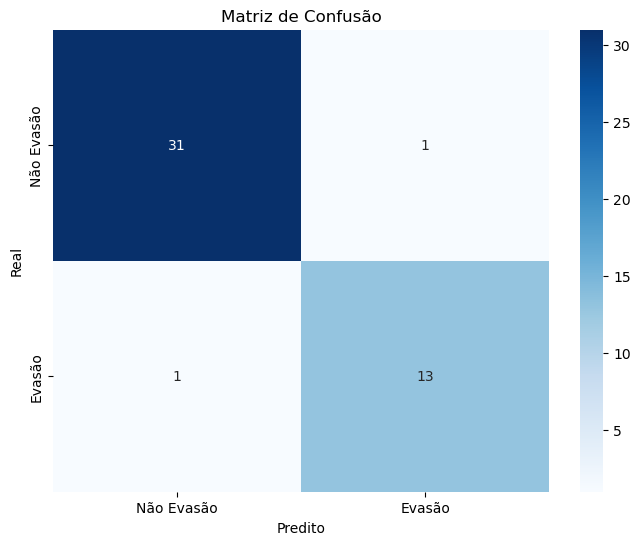

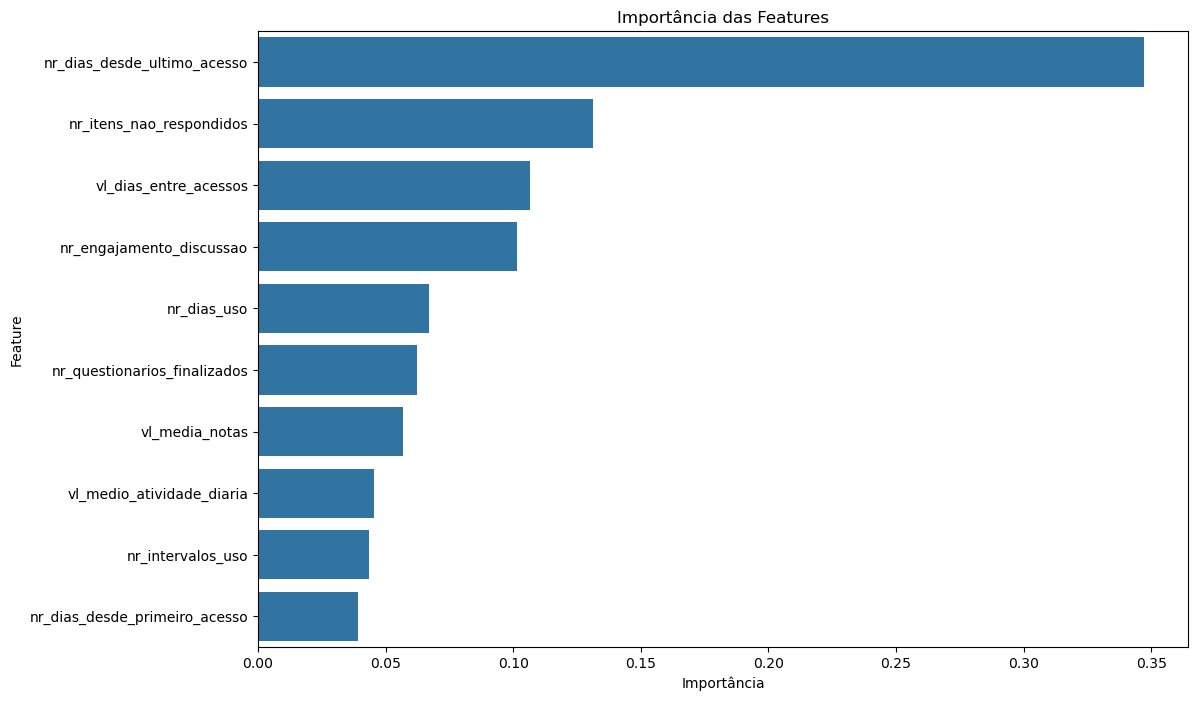

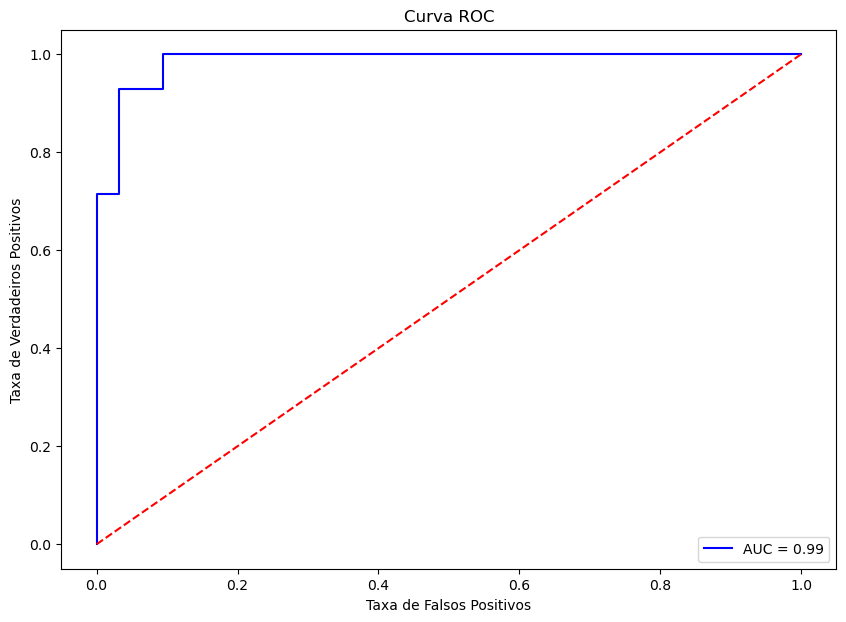

/home/zgui/miniconda3/envs/projeto-ia/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [10:00:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/zgui/miniconda3/envs/projeto-ia/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [10:00:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/zgui/miniconda3/envs/projeto-ia/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [10:00:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/zgui/miniconda3/envs/projeto-ia/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [10:00:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fo

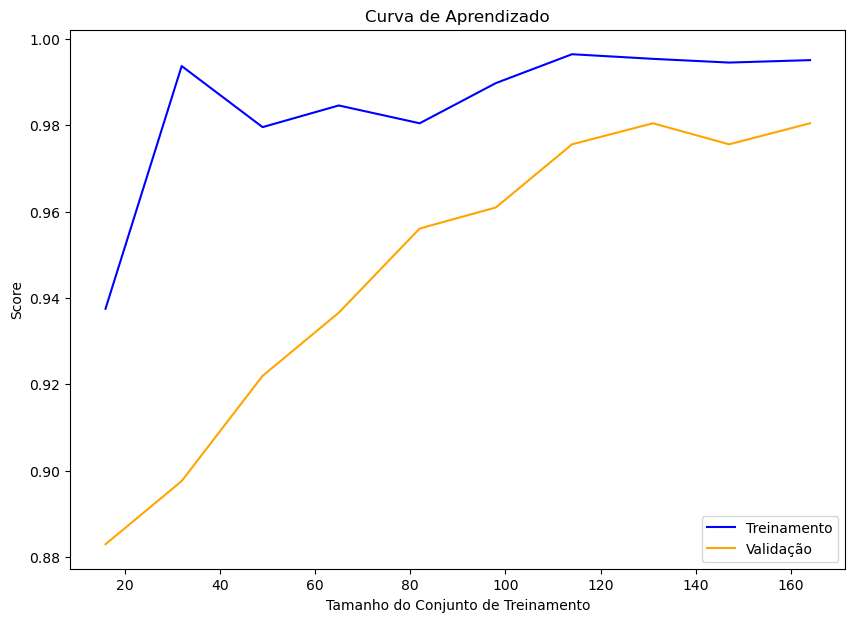

In [116]:
# Chamar a função para plotar as métricas
plot_metrics(y_test, y_pred, 'xgb')

In [117]:
# Salvar metricas em um arquivo JSON
metrics = {
    'best_params': random_search.best_params_,
    'best_score': random_search.best_score_,
    'classification_report': classification_report(y_test, y_pred, output_dict=True),
    'confusion_matrix': confusion_matrix(y_test, y_pred).tolist(),
    'roc_auc': roc_auc_score(y_test, y_pred_proba),
    'recall': recall_score(y_test, y_pred),
}
with open('models/metrics_xgb.json', 'w') as f:
    json.dump(metrics, f, indent=4)
    
# Salvar o modelo treinado
joblib.dump(random_search.best_estimator_, 'models/modelo_xgb.pkl')

['models/modelo_xgb.pkl']

# Parte 6
## Comparando modelos

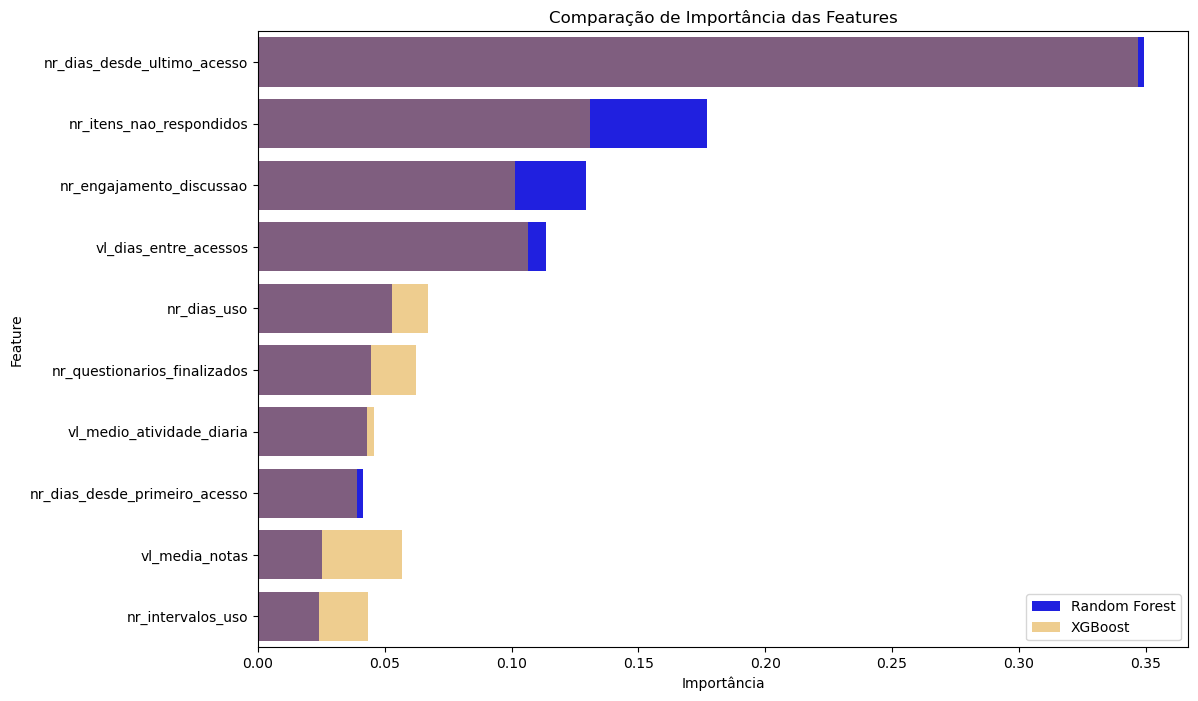

In [118]:
# Comparar os modelos "modelo_rfc.pkl" e "modelo_xgb.pkl"
model_rfc = joblib.load('models/modelo_rfc.pkl')
model_xgb = joblib.load('models/modelo_xgb.pkl')

# Comparar as importâncias das features
importances_rfc = model_rfc.named_steps['rfc'].feature_importances_
importances_xgb = model_xgb.named_steps['xgb'].feature_importances_

# Criar DataFrame para as importâncias
importance_df_rfc = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances_rfc})
importance_df_xgb = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances_xgb})

# Ordenar por importância
importance_df_rfc = importance_df_rfc.sort_values(by='Importance', ascending=False)
importance_df_xgb = importance_df_xgb.sort_values(by='Importance', ascending=False)

# Plotar as importâncias
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_rfc, color='blue', label='Random Forest')
sns.barplot(x='Importance', y='Feature', data=importance_df_xgb, color='orange', label='XGBoost', alpha=0.5)
plt.title('Comparação de Importância das Features')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.legend()
plt.show()

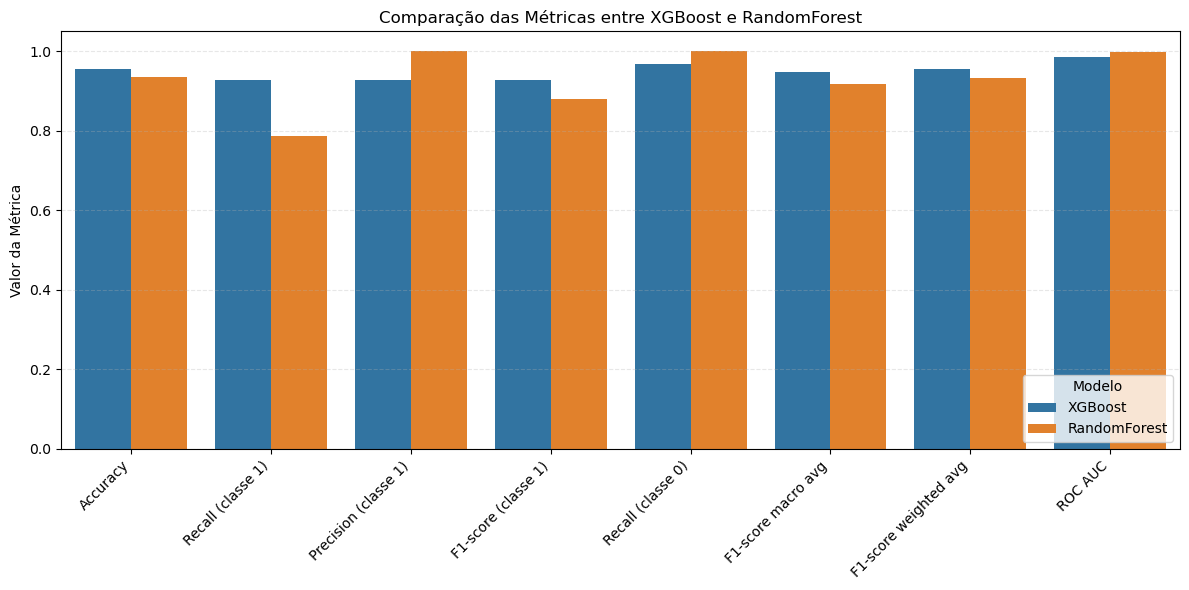

,XGBoost,RandomForest,Melhor Modelo
Accuracy,0.956522,0.934783,XGBoost
Recall (classe 1),0.928571,0.785714,XGBoost
Precision (classe 1),0.928571,1.000000,RandomForest
F1-score (classe 1),0.928571,0.880000,XGBoost
Recall (classe 0),0.968750,1.000000,RandomForest
F1-score macro avg,0.948661,0.917612,XGBoost
F1-score weighted avg,0.956522,0.932330,XGBoost
ROC AUC,0.986607,0.997768,RandomForest



-------------------------------------------------------
Tamanho modelo RFC: 1097.34 KB
Tamanho modelo XGB: 187.72 KB
-------------------------------------------------------


Veredito Final: O modelo com melhor desempenho geral foi o XGBoost.


In [119]:
# Carregar os arquivos JSON com as métricas
with open("models/metrics_rfc.json", "r") as f:
    metrics_rfc = json.load(f)

with open("models/metrics_xgb.json", "r") as f:
    metrics_xgb = json.load(f)

# Extrair métricas principais
comparacao = {
    "Accuracy": [metrics_xgb["classification_report"]["accuracy"], metrics_rfc["classification_report"]["accuracy"]],
    "Recall (classe 1)": [metrics_xgb["classification_report"]["1"]["recall"],
                          metrics_rfc["classification_report"]["1"]["recall"]],
    "Precision (classe 1)": [metrics_xgb["classification_report"]["1"]["precision"],
                             metrics_rfc["classification_report"]["1"]["precision"]],
    "F1-score (classe 1)": [metrics_xgb["classification_report"]["1"]["f1-score"],
                            metrics_rfc["classification_report"]["1"]["f1-score"]],
    "Recall (classe 0)": [metrics_xgb["classification_report"]["0"]["recall"],
                          metrics_rfc["classification_report"]["0"]["recall"]],
    "F1-score macro avg": [metrics_xgb["classification_report"]["macro avg"]["f1-score"],
                           metrics_rfc["classification_report"]["macro avg"]["f1-score"]],
    "F1-score weighted avg": [metrics_xgb["classification_report"]["weighted avg"]["f1-score"],
                              metrics_rfc["classification_report"]["weighted avg"]["f1-score"]],
    "ROC AUC": [metrics_xgb["roc_auc"], metrics_rfc["roc_auc"]],
}


# Criar DataFrame para visualização
df_comparacao = pd.DataFrame(comparacao, index=["XGBoost", "RandomForest"]).T

# Adicionar coluna com o melhor modelo por métrica
df_comparacao["Melhor Modelo"] = df_comparacao.apply(lambda x: "XGBoost" if x["XGBoost"] > x["RandomForest"] else "RandomForest", axis=1)

# Resetar índice para usar a métrica como coluna
df_plot = df_comparacao.reset_index().rename(columns={'index': 'Métrica'})

# Converter para formato long para facilitar o uso com seaborn
df_long = pd.melt(df_plot, id_vars=['Métrica', 'Melhor Modelo'],
                  value_vars=['XGBoost', 'RandomForest'],
                  var_name='Modelo', value_name='Valor')

# Plotar gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=df_long, x='Métrica', y='Valor', hue='Modelo')
plt.title('Comparação das Métricas entre XGBoost e RandomForest')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Valor da Métrica')
plt.xlabel('')
plt.ylim(0, 1.05)
plt.legend(title='Modelo', loc='lower right')
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.show()

display(df_comparacao)

# Exibir tamanho dos modelos
tamanho_rfc = os.path.getsize("models/modelo_rfc.pkl") / 1024
tamanho_xgb = os.path.getsize("models/modelo_xgb.pkl") / 1024

print("\n-------------------------------------------------------")
print(f"Tamanho modelo RFC: {tamanho_rfc:.2f} KB")
print(f"Tamanho modelo XGB: {tamanho_xgb:.2f} KB")
print("-------------------------------------------------------\n")

# Veredito geral baseado no número de vitórias
vencedor_geral = df_comparacao["Melhor Modelo"].value_counts().idxmax()
print(f"\nVeredito Final: O modelo com melhor desempenho geral foi o {vencedor_geral}.")



In [136]:
# Usando o modelo XGBoost para prever chances de evasão
def prever_evasao(model, X):
    """
    Prever a probabilidade de evasão usando o modelo XGBoost.

    Parâmetros:
    - model: modelo treinado do tipo XGBoost.
    - X: DataFrame com as features para previsão.

    Retorna:
    - DataFrame com as previsões de evasão em porcentagem.
    """
    probabilidade_evasao = model.predict_proba(X)[:, 1] * 100  # Multiplica por 100 para converter em porcentagem
    return pd.DataFrame({'Probabilidade de Evasão (%)': probabilidade_evasao})

# Prever evasão no conjunto de teste
evasao_teste = prever_evasao(model_xgb, X_test)

# Exibir previsões do maior para o menor
evasao_teste['ID'] = df_tst.index + 1  # Adiciona uma coluna ID começando de 1
evasao_teste = evasao_teste.sort_values(by='Probabilidade de Evasão (%)', ascending=False).reset_index(drop=True)
evasao_teste = evasao_teste[['ID', 'Probabilidade de Evasão (%)']]
# Exibir as previsões
print("\nPrevisões de Evasão no Conjunto de Teste:")
evasao_teste





Previsões de Evasão no Conjunto de Teste:


,ID,Probabilidade de Evasão (%)
0,4,99.187103
1,47,99.187103
2,69,99.187103
3,79,99.187103
4,96,99.187103
5,90,98.823158
6,58,98.823158
7,88,95.673386
8,72,95.673386
9,31,90.441338
